# Análise socioeconômica e o Novo Corona Vírus
Neste trabalho, buscamos analisar o dataset `COVID19_state.csv` que contem dados geograficos e socioeconômicos dos estados dos Estados Unidos, disponível para download em: https://www.kaggle.com/nightranger77/covid19-state-data (Acesso em:26/09/2020)

In [46]:
#Carregando as bibliotecas utilizadas neste notebook
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
import plotly.graph_objects as go

#### Descrição das colunas de nosso dataset
__State__ = Estados dos Estados Unidos<br>
__Tested__ = Número de testes do COVID19<br>
__Infected__ = Número de infecções por COVID19<br>
__Deaths__ = Número de mortes por COVID19<br>
__Population__ = População do Estado<br>
__Pop Density__ = Densidade populacional por metro quadrado<br>
__Gini__ = Coeficiente de Gini para desigualdade de renda<br>
__ICU Beds__ = Número de camas nas Unidades de Tratamento Intensivo<br>
__Income__ = Renda per Capita ($)<br>
__GDP__ = PIB per capita<br>
__Unemployment__ = Desemprego como porcentagem da força de trabalho<br>
__Sex Ratio__ = Homens/Mulheres<br>
__Smoking Rate__ = Porcentagem de fumantes<br>
__Flu Deaths__ = Taxa de mortes a cada 100'000 habitantes para Gripe e Pneumonia<br>
__Respiratory__ Deaths = Taxa de mortes a cada 100'000 habitantes para Doenças Respiratórias Crônicas<br>
__Physicians__ = Número de médicos ativos de cuidados primários e especializados<br>
__Hospitals__ = Número de Hospitais<br>
__Health Spending__ = Spending for all health services (em dólares)<br>
__Pollution__ = Medição da exposição do público a material particulado<br>
__Med-Large Airports__ = Número de aeroportos de médio e grande porte<br>
__Temperature__ = Average temperature in 2019<br>
__Urban__ = Porcentagem da população que vive em um ambiente urbano<br>
__Age 0-25__ = People ages 0-25<br>
__Age 26-54__ = People ages 26-54<br>
__Age 55+__ = People ages 55+<br>
__School__ Closure Date = Date that schools closed<br>

In [47]:
#Carregando o Dataset
#Por favor, manter o notebook e 

df = pd.read_csv('https://raw.githubusercontent.com/douradorobert/covid19andSocioeconomic/master/COVID19_state.csv',
                 index_col = 'State').drop('District of Columbia')
df.head(8)

,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
State,,,,,,,,,,,,,,,,,,,,,
Alaska,36380,399,10,734002,1.2863,0.4081,119,59687,73205,5.8,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
Alabama,157566,12376,504,4908621,96.9221,0.4847,1533,42334,45219,2.7,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
Arkansas,93701,4923,102,3038999,58.4030,0.4719,732,42566,42454,3.5,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
Arizona,220612,14566,704,7378494,64.9550,0.4713,1559,43650,48055,4.5,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
California,1339316,81795,3334,39937489,256.3727,0.4899,7338,62586,74205,3.9,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20
Colorado,131837,22482,1257,5845526,56.4011,0.4586,1597,56846,63882,2.5,...,89,6804,6.7,1.0,45.1,86.2,0.33,0.40,0.27,03/23/20
Connecticut,185520,38430,3472,3563077,735.8689,0.4945,674,74561,76342,3.8,...,32,9859,7.2,1.0,49.0,88.0,0.30,0.38,0.32,03/17/20
Delaware,44132,8037,304,982895,504.3073,0.4522,186,51449,77253,3.9,...,7,10254,8.3,0.0,55.3,83.3,0.30,0.37,0.33,03/16/20


In [48]:
#O seguinte dataset contém mais informações sobre os estados norte americanos,
#mas para que não haja distorção com relação a coleta desses dados, eu não os utilizei

#Limpando o dataset para manter apenas a coluna de interesse (as siglas dos estados)
df2 = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv', index_col = 'state')
df2 = df2.loc[:,'code']
df2.head()

state
Alabama       AL
Alaska        AK
Arizona       AZ
Arkansas      AR
California    CA
Name: code, dtype: object

In [49]:
#Adicionando as siglas aos seus respectivos estados no dataframe original

df = pd.concat([df, df2], axis=1, sort=False)
df.head()

,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,...,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date,code
Alaska,36380,399,10,734002,1.2863,0.4081,119,59687,73205,5.8,...,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20,AK
Alabama,157566,12376,504,4908621,96.9221,0.4847,1533,42334,45219,2.7,...,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20,AL
Arkansas,93701,4923,102,3038999,58.4030,0.4719,732,42566,42454,3.5,...,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20,AR
Arizona,220612,14566,704,7378494,64.9550,0.4713,1559,43650,48055,4.5,...,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20,AZ
California,1339316,81795,3334,39937489,256.3727,0.4899,7338,62586,74205,3.9,...,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20,CA


In [77]:
#Código base disponível em: https://plotly.com/python/choropleth-maps/ (Acesso em: 27/09/2020)

#A seguinte função retorna o mapa dos estados no estilo heatmap, em relação a variável de nossa escolha
def map_usa(y = df['Deaths'], x = df['code'], titulo = 'USA', escala = 'Escala'):
    '''Função específica para este notebook, ou que contenham um `pandas.core.frame.DataFrame` com uma coluna
    com as siglas dos estados norte americanos devendo ser este explicidade como argumento x da função.
    Argumento y deve ser a coluna com a variável a ser analisada'''
    fig = go.Figure(data=go.Choropleth(
        locations=x, # Spatial coordinates
        z = y, # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Blues',
        colorbar_title = escala,
    ))

    fig.update_layout(
        title_text = titulo,
        geo_scope='usa', # limite map scope to USA
    )

    fig.show()

In [80]:
# Relação mortes por infectados

map_usa(df['Deaths']/df['Infected'],
        titulo = 'Mortes por infectados comprovados nos Estados Unidos', escala= 'Mortes por infectados')

Ao se utilizar as variáveis do dataframe disponível, não notamos nenhuma concentração em alguma região do país, o que sugere de certa forma uma heterogeneidade nos dados.

count    50.000000
mean      0.044038
std       0.018496
min       0.010926
25%       0.032781
50%       0.044133
75%       0.054497
max       0.095836
dtype: float64


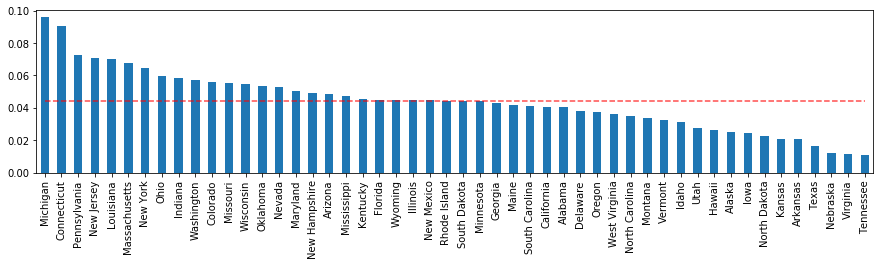

In [83]:
#Estatísticas sobre mortes por infectados

print((df['Deaths']/df['Infected']).describe()) # Estatísticas
plt.figure(figsize=(15, 3))  # Dimensões do gráfico
((df['Deaths']/df['Infected']).sort_values(ascending = False)).plot.bar()  # criação, ordenamento e plot da série "mortes/Infectados"
plt.plot(df['code'], [(df['Deaths']/df['Infected']).describe()['mean']]*50, 'r--',color = 'red', alpha = 0.7)

Vemos acima que a média de mortes por infectados compravados é de 4,4%. Contudo, há estados que possuem taxas próximas à 10% e outros com taxas bem pequenas, próximas à 1%. Tentaremos fazer uma análise utilizando o método de regressão linear para se entender quais seriam as variáveis que possuem mais impacto nesses números.

### Regressão Linear
Para prosseguir, é necessário fazer com que algumas variáveis absolutas sejam transformadas em variáveis *per capita*, pois por exemplo, é claro que um estado que possui grande população também terá mais pessoas nas faixas de idade de **0 - 25, 26-54 e 54+**. Portanto, o primeiro passo será isolar essas variáveis e fazer a transformação.

In [84]:
#Removendo as colunas que não fazem sentido terem seus valores per capita
#Algumas variáveis já são per capita, outras são categoricas e outras não tem correlação direta com o tamanho da população,
#como a temperatura.
columnsNOTpercapita = ['Population','Gini','Income','GDP','Unemployment','Sex Ratio',
                       'Smoking Rate','Pollution','Med-Large Airports','Temperature',
                       'Urban','School Closure Date', 'code']

In [85]:
#criando o dataset com as variáveis per capita

df_percapita = df.drop(columnsNOTpercapita, axis = 1).apply(lambda col: col/df['Population'])
df_percapita.head(3)

,Tested,Infected,Deaths,Pop Density,ICU Beds,Flu Deaths,Respiratory Deaths,Physicians,Hospitals,Health Spending,Age 0-25,Age 26-54,Age 55+
Alaska,0.049564,0.000544,0.000014,0.000002,0.000162,0.000016,0.000048,0.002589,0.000029,0.015074,4.904619e-07,5.313337e-07,3.405985e-07
Alabama,0.032100,0.002521,0.000103,0.000020,0.000312,0.000004,0.000012,0.002486,0.000021,0.001483,6.722866e-08,7.537759e-08,6.315419e-08
Arkansas,0.030833,0.001620,0.000034,0.000019,0.000241,0.000006,0.000020,0.002353,0.000029,0.002438,1.118789e-07,1.217506e-07,9.871672e-08


In [13]:
#criando o dataframe com as variáveis preservadas e as novas variáveis per capita, que serão utilizadas na regressão

df_lm = pd.concat([df_percapita, df[columnsNOTpercapita]], axis=1, sort=False)
df_lm.head(3)

,Tested,Infected,Deaths,Pop Density,ICU Beds,Flu Deaths,Respiratory Deaths,Physicians,Hospitals,Health Spending,...,GDP,Unemployment,Sex Ratio,Smoking Rate,Pollution,Med-Large Airports,Temperature,Urban,School Closure Date,code
Alaska,0.049564,0.000544,0.000014,0.000002,0.000162,0.000016,0.000048,0.002589,0.000029,0.015074,...,73205,5.8,1.054688,21.0,6.4,1.0,26.6,66.0,03/19/20,AK
Alabama,0.032100,0.002521,0.000103,0.000020,0.000312,0.000004,0.000012,0.002486,0.000021,0.001483,...,45219,2.7,0.930145,20.9,8.1,1.0,62.8,59.0,03/16/20,AL
Arkansas,0.030833,0.001620,0.000034,0.000019,0.000241,0.000006,0.000020,0.002353,0.000029,0.002438,...,42454,3.5,0.956630,22.3,7.1,0.0,60.4,56.2,03/17/20,AR


#### Regressão Linear - Disseminação da Doença

Para isso, utilizamos como variável dependente o número de infectados *per capita*, realizando diversos testes com diferentes variáveis explicativas

In [170]:
X = df_lm[['Income','Age 26-54','Age 55+','Health Spending']]
Y = df_lm['Infected']

In [171]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



X = sm.add_constant(X) 
Y=list(Y)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

lm_results = model.summary()
print(lm_results)

Intercept: 
 -0.00398718434435071
Coefficients: 
 [ 1.88688546e-07 -2.46993037e+05  1.49556442e+05  4.96928396e+00]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     9.755
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           9.07e-06
Time:                        20:03:03   Log-Likelihood:                 187.46
No. Observations:                  50   AIC:                            -364.9
Df Residuals:                      45   BIC:                            -355.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------

<function matplotlib.pyplot.show(*args, **kw)>

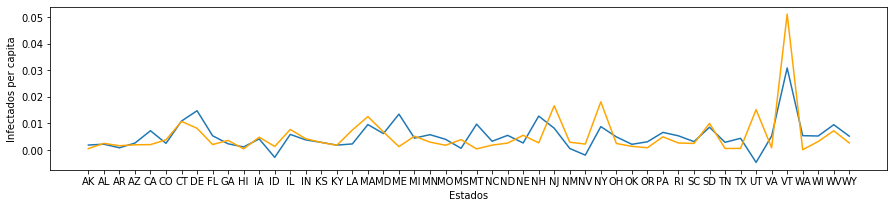

In [180]:
predictions.index = df['code']
plt.figure(figsize=(15, 3))
plt.plot(predictions)
plt.plot(df_lm['code'],df_lm['Infected'],'orange')
plt.ylabel('Infectados per capita')
plt.xlabel('Estados')
plt.show

Temperatura média, porcentagem da população que vive em ambiente urbano, densidade da população, poluição e índice de Gini se mostraram insignificantes para exlpicar a disseminação da doença.<br>

Já aeroportos de médio e grande porte se mostrou ser estatísticamente significante ao nível de 10%, mas é mais provável que ele esteja correlacionado com a renda *per capita*, que se mostrou ainda mais significante, tendo um impacto positivo sobre a disseminação da doença. Essa variável pode ser relacionada ao fato de que estados com maior renda *per capita* geram maiores fluxos comercias e de pessoas, que poderiam levar consigos o vírus da doença.<br>

Em relação as faixas de idade, a proporção da população abaixo de 55 anos possui seu coeficiente negativo, sugerindo que os mais jovens sejam em grande parte assintomáticos e dessa forma não descobrem que contraíram a doença, não contribuindo para a coleta de dados. Se levamos em consideração que a probabilidade de contração do Novo Corona Vírus é igual entre as diferentes faixas etárias, não deveria haver significância nessa variável.<br>

Além disso, os gastos com saúde também mostraram altamente significantes na regressão, no entanto é mais provavel que ela esteja mais correlacionada com o número de infectados *per capita*. Contudo, seria interessante se aprofundar nessa variável.

Portanto, do nosso conjunto de dados, a renda per capita se mostrou mais explicativa para nossa análise

#### Regressão Linear - Mortes por Infectados

In [163]:
X = df_lm[['Hospitals','Age 26-54','Age 55+']]
Y = df_lm['Deaths']

In [164]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



X = sm.add_constant(X) 
Y=list(Y)

model = sm.OLS(Y, X).fit()
predictions2 = model.predict(X) 

lm_results = model.summary()
print(lm_results)

Intercept: 
 0.0003621911677308683
Coefficients: 
 [   -7.96250658 -3570.73457637  4790.25859154]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     3.705
Date:                Sun, 27 Sep 2020   Prob (F-statistic):             0.0181
Time:                        20:01:44   Log-Likelihood:                 333.30
No. Observations:                  50   AIC:                            -658.6
Df Residuals:                      46   BIC:                            -650.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

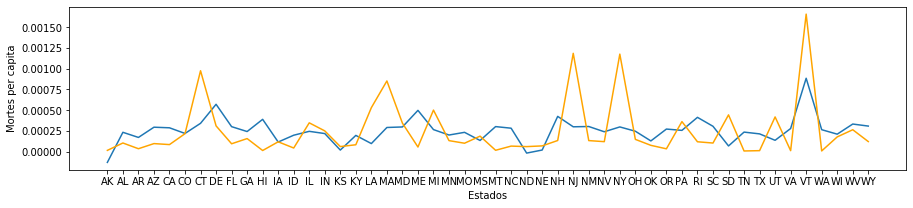

In [181]:
predictions2.index = df['code']
plt.figure(figsize=(15, 3))
plt.plot(predictions2)
plt.plot(df_lm['code'],df_lm['Deaths'],'orange')
plt.ylabel('Mortes per capita')
plt.xlabel('Estados')
plt.show()

Índice de Gini se mostrou pouco relevante novamente. Curioso é que nesse caso, a renda *per capita* também se mostrou estatísticamente insignificante, reforçando o ponto de que ela causa efeito disseminador, mas também dá maior acessibilidade à cuidados e tratamentos se necessário.

Novamente a idade da população tem efeito importantíssimo sobre a letalidade da doença, mostrando que os mais velhos são de fato mais vulneráveis a doença.

Desta vez, o número de Hospitais por pessoa se mostrou significante também, mostrando que os serviços de saúde tem grande força sobre o destino de um infectado, sugerindo que as condições atuais de saúde da pessoa embora sejam relevantes, os cuidados se fazem extremamente necessários.

In [74]:
#Na segunda parte do trabalho quero investigar porque as mortes por Covid19 per capiita se concentraram
#no "nordeste" americano(eu não sei se aquela região tem um nome), além talvez dos gastos totais com saúde
map_usa(df_lm['Deaths'], df_lm['code'])